<a href="https://colab.research.google.com/github/ssook1222/bigdata-analysist-certificate/blob/master/bigdata-analysist-certificate/task3/task3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 독립 표본 검정

> ! 다시 한 번 풀어보기

독립 표본 t검정의 경우 집단의 정규성에 따라 접근방식이 다름.     
정규성 검정은 개수가 적을 경우 shapiro , 샘플 5000개 이상으로 많을 경우 anderson을 통해 확인해야 함.    

#### 데이터가 정규성을 가지는 경우(모수적 검정)
두 집단의 등분산 검정을 한 후       
`from scipy.stats import ttest_ind` 사용

데이터가 정규성을 가지지 않는 경우  
비모수적 검정(윌콕슨 순위 부호 합 등...) 사용

----

### Question 1

두 개 학급의 시험 성적에 대한 데이터이다. 두 학습의 시험 평균(비모수 검정의 경우 중위값)은 동일하다 말할 수 있는지 확인하라.

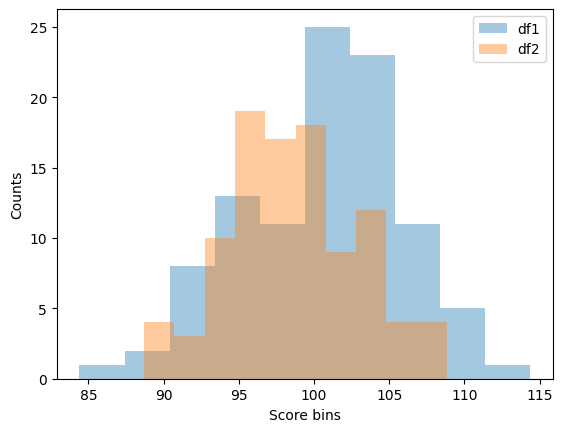

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

#### 정규성 검정 진행

In [3]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)


p value가 유의수준 95%에서 0.05보다 크므로, 두 그룹 모두 Shapiro 검정 결과 귀무가설(정규성을 가진다)을 기각하지 못한다.   
`두 그룹은 정규성을 가진다.`

#### 등분산 검정

In [5]:
from scipy.stats import levene
print(levene(df1['data'],df2['data']))

LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)


두 그룹의 levene 검정을 확인해 본 결과 pvalue가 0.11로 귀무가설을 기각할 수 없다.    
그러므로 `두 그룹은 등분산을 가진다.`

#### 독립 표본 검정

In [8]:
from scipy.stats import ttest_ind
print(ttest_ind(df1,df2,equal_var=True))

TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


등분산이기 때문에 `equal_var = True` 파라미터를 주고 ttest_ind 모듈을 이용하여 t-test를 진행한다.    
p value가 0.006이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고 대립가설을 채택한다.    

---

### Question 2

두 개 학급의 시험성적에 대한 데이터이다.     
두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인하라.

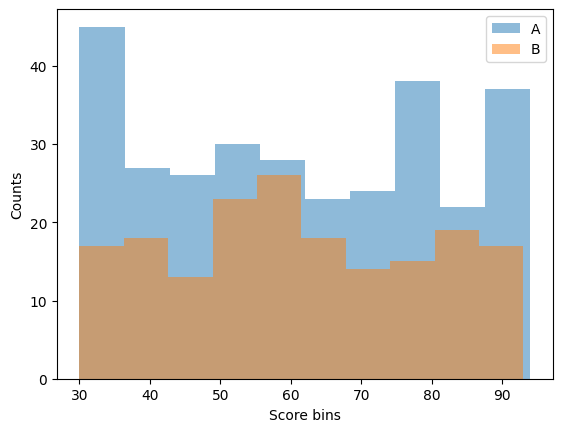

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

df1 = df['A']
df2 = df['B'].dropna()

plt.hist(df1,alpha=0.5,label='A')
plt.hist(df2,alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [17]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)


두 그룹 중 하나가 정규성을 위배한다.     
이 중 한 그룹만 정규성을 위배해도 독립표본 t-검정을 할 수 없다.    
따라서 비모수 검정을 시행해야 한다.    

In [20]:
from scipy.stats import mannwhitneyu , ranksums

print(mannwhitneyu(df1,df2))
print(ranksums(df1,df2))

MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)


유의수준 95%에서 Mann-Whitney U Test와 윌콕슨 순위합 검정 결과 pvalue는 0.98로 귀무가설을 기각할 수 없다.      
즉, 평균이 같다는 기존 가설을 기각하지 못하므로 `두 그룹의 평균은 같다.`

---

### Question 3.

두 개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라.

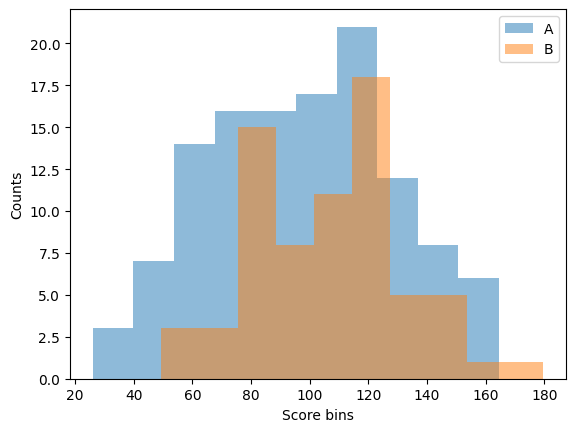

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

df1 = df[df['group'] =='a'].data
df2 = df[df['group'] =='b'].data

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [23]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9834123253822327, pvalue=0.1473984718322754)
ShapiroResult(statistic=0.9831852316856384, pvalue=0.4701973497867584)


두 그룹 모두 정규성을 가진다.

In [25]:
from scipy.stats import levene
print(levene(df1,df2))

LeveneResult(statistic=6.185601018015722, pvalue=0.013750484571911342)


두 그룹의 levene 검정을 확인해 본 결과 p-value가 0.013로 귀무가설을 기각할 수 있다. 대립가설을 채택한다.           
그러므로 `두 그룹은 등분산을 가지지 않는다.`

In [27]:
from scipy.stats import ttest_ind
print(ttest_ind(df1,df2,equal_var=False))

TtestResult(statistic=-2.1949470315829265, pvalue=0.029512802991767898, df=171.25282465005142)


등분산이 아니기 때문에 equal_var = False 파라미터를 주고 ttest_ind 모듈을 이용하여 t-test를 진행한다.      
p value가 0.04이므로 귀무가설(각 그룹의 평균값은 동일하다)를 기각하고      
대립가설(`두 그룹의 평균은 동일하지 않다`)을 채택한다.

---

### Question 4.

두 개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라.

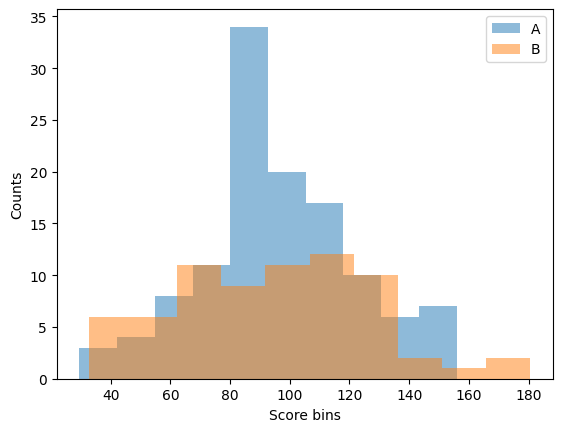

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

df1 = df['a'].dropna()
df2 = df['b'].dropna()

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [31]:
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

ShapiroResult(statistic=0.9865895509719849, pvalue=0.28390026092529297)
ShapiroResult(statistic=0.9854326844215393, pvalue=0.5937624573707581)


두 그룹 모두 Shapiro검정 결과 귀무가설(정규성을 가진다)을 기각 하지 못한다.   
두 그룹은 정규성을 가진다.    

In [33]:
from scipy.stats import levene
print(levene(df1,df2))

LeveneResult(statistic=3.9862856894158347, pvalue=0.04731495612868527)


두 그룹의 levene 검정을 확인해 본 결과 p-value가 0.013로 귀무가설을 기각할 수 있다. 대립가설을 채택한다.     
그러므로 두 그룹은 등분산을 가지지 않는다.    

In [34]:
from scipy.stats import ttest_ind
print(ttest_ind(df1,df2,equal_var=False))

TtestResult(statistic=0.0015963310698567184, pvalue=0.9987289046092704, df=122.72255248639058)


등분산이 아니기 때문에 `equal_var = False` 파라미터를 주고 ttest_ind 모듈을 이용하여 t-test를 진행한다.      
p value가 0.99이므로 귀무가설(`각 그룹의 평균값은 동일하다`)를 채택하고      
대립가설(두 그룹의 평균은 동일하지 않다)을 기각한다.